In [70]:
import pandas as pd
import numpy as np
import os
import datetime as dt

In [71]:
train_df = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/train.csv')
train_df

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57세,경상,0,0,1,0,3


In [72]:
daegu_boandoong = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/external_open/대구 보안등 정보.csv', encoding='euc-kr')

C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\1729847996.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  daegu_boandoong = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/external_open/대구 보안등 정보.csv', encoding='euc-kr')


In [73]:
daegu_child = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/external_open/대구 어린이 보호 구역 정보.csv', encoding='euc-kr')

In [74]:
daegu_parking = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/external_open/대구 주차장 정보.csv', encoding='euc-kr')

In [75]:
daegu_CCTV = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/external_open/대구 CCTV 정보.csv', encoding='euc-kr')

### train 튜닝

In [76]:
cat_col = train_df.dtypes[train_df.dtypes == 'object'].index.to_list()

for cat in cat_col:
    if len(train_df[cat].unique()) < 20:
        print(f'column명 : {cat} | unique 값 : {train_df[cat].unique()}')

column명 : 요일 | unique 값 : ['화요일' '수요일' '목요일' '금요일' '토요일' '일요일' '월요일']
column명 : 기상상태 | unique 값 : ['맑음' '흐림' '기타' '비' '안개' '눈']
column명 : 도로형태 | unique 값 : ['단일로 - 기타' '교차로 - 교차로안' '기타 - 기타' '단일로 - 터널' '단일로 - 지하차도(도로)내' '단일로 - 교량'
 '교차로 - 교차로횡단보도내' '주차장 - 주차장' '교차로 - 교차로부근' '단일로 - 고가도로위' '미분류 - 미분류']
column명 : 노면상태 | unique 값 : ['건조' '젖음/습기' '서리/결빙' '기타' '침수' '적설']
column명 : 사고유형 | unique 값 : ['차대사람' '차대차' '차량단독']
column명 : 사고유형 - 세부분류 | unique 값 : ['길가장자리구역통행중' '보도통행중' '차도통행중' '추돌' '측면충돌' '기타' '공작물충돌' '횡단중' '정면충돌'
 '후진중충돌' '전도전복 - 전도' '도로외이탈 - 추락' '도로외이탈 - 기타' '전도전복 - 전복']
column명 : 법규위반 | unique 값 : ['안전운전불이행' '기타' '교차로운행방법위반' '신호위반' '중앙선침범' '안전거리미확보' '차로위반' '보행자보호의무위반'
 '직진우회전진행방해' '과속' '불법유턴']
column명 : 가해운전자 차종 | unique 값 : ['승용' '승합' '기타불명' '화물' '이륜' '특수' '자전거' '원동기' '건설기계' '사륜오토바이(ATV)'
 '개인형이동수단(PM)' '농기계']
column명 : 가해운전자 성별 | unique 값 : ['여' '남' '기타불명']
column명 : 가해운전자 상해정도 | unique 값 : ['상해없음' '경상' '기타불명' '중상' '부상신고' '사망']
column명 : 피해운전자 차종 | unique 값 : ['보행자' '승용' '자전거' '승

In [77]:
train_df.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

### I Col 만들기

#### 1. 사고일시 쪼개기
- year / month / day / hour 쪼개기
- hour에 따라서 시간대 쪼개기

In [78]:
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'], format='%Y-%m-%d %H')
train_df['year'] = train_df['사고일시'].dt.year
train_df['month'] = train_df['사고일시'].dt.month
train_df['day'] = train_df['사고일시'].dt.day
train_df['hour'] = train_df['사고일시'].dt.hour

In [79]:
for idx in train_df[(train_df['hour'] >=2) & (train_df['hour'] <= 7)].index:
    train_df.loc[idx,'시간대']= '새벽'
for idx in train_df[(train_df['hour'] >=8) & (train_df['hour'] <= 12)].index:
    train_df.loc[idx,'시간대']= '오전'
for idx in train_df[(train_df['hour'] >=13) & (train_df['hour'] <= 17)].index:
    train_df.loc[idx,'시간대']= '오후'
for idx in train_df[(train_df['hour'] >=18) & (train_df['hour'] <= 21)].index:
    train_df.loc[idx,'시간대']= '저녁'
for idx in train_df[(train_df['hour'] >=22) | (train_df['hour'] <= 1)].index:
    train_df.loc[idx,'시간대']= '밤'

C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2452303225.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '새벽' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_df.loc[idx,'시간대']= '새벽'


In [80]:
train_df = train_df.drop(columns=['사고일시'])

#### 2. 요일 쪼개기
- 평일 / 주말 쪼개기

In [81]:
for idx in train_df[train_df['요일'].isin(['화요일', '수요일', '목요일', '금요일', '월요일'])].index:
    train_df.loc[idx,'weekday']= '평일'
for idx in train_df[train_df['요일'].isin(['토요일','일요일'])].index:
    train_df.loc[idx,'weekday']= '주말'

C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\227001375.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '평일' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_df.loc[idx,'weekday']= '평일'


#### 3. 도로형태 쪼개기
- 도로형태 상위/하위 쪼개기

In [82]:
for idx,list_splitted in enumerate(train_df['도로형태'].str.split(' - ')):
    train_df.loc[idx,'도로형태_상위'] = list_splitted[0]
    train_df.loc[idx,'도로형태_하위'] = list_splitted[1]

C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\102790823.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '단일로' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_df.loc[idx,'도로형태_상위'] = list_splitted[0]
C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\102790823.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '기타' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_df.loc[idx,'도로형태_하위'] = list_splitted[1]


In [83]:
train_df = train_df.drop(columns=['도로형태'])

#### 4. 시군구 쪼개기

In [84]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['시','군','구']] = train_df['시군구'].str.extract(location_pattern)

In [85]:
train_df = train_df.drop(columns=['시군구'])

#### Test도 동일하게 해주기

In [86]:
test = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/test.csv')
test

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차
...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차


In [87]:
### preprocessing 함수화
def preprocessing(df):
    df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y-%m-%d %H')
    df['year'] = df['사고일시'].dt.year
    df['month'] = df['사고일시'].dt.month
    df['day'] = df['사고일시'].dt.day
    df['hour'] = df['사고일시'].dt.hour

    for idx in df[(df['hour'] >=2) & (df['hour'] <= 7)].index:
        df.loc[idx,'시간대']= '새벽'
    for idx in df[(df['hour'] >=8) & (df['hour'] <= 12)].index:
        df.loc[idx,'시간대']= '오전'
    for idx in df[(df['hour'] >=13) & (df['hour'] <= 17)].index:
        df.loc[idx,'시간대']= '오후'
    for idx in df[(df['hour'] >=18) & (df['hour'] <= 21)].index:
        df.loc[idx,'시간대']= '저녁'
    for idx in df[(df['hour'] >=22) | (df['hour'] <= 1)].index:
        df.loc[idx,'시간대']= '밤'

    df = df.drop(columns=['사고일시'])

    for idx in df[df['요일'].isin(['화요일', '수요일', '목요일', '금요일', '월요일'])].index:
        df.loc[idx,'weekday']= '평일'
    for idx in df[df['요일'].isin(['토요일','일요일'])].index:
        df.loc[idx,'weekday']= '주말'

    for idx,list_splitted in enumerate(df['도로형태'].str.split(' - ')):
        df.loc[idx,'도로형태_상위'] = list_splitted[0]
        df.loc[idx,'도로형태_하위'] = list_splitted[1]

    df = df.drop(columns=['도로형태'])

    location_pattern = r'(\S+) (\S+) (\S+)'

    df[['시','군','구']] = df['시군구'].str.extract(location_pattern)

    df = df.drop(columns=['시군구'])

    return df

In [88]:
test_df = preprocessing(test)

C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '새벽' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[idx,'시간대']= '새벽'
C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '평일' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[idx,'weekday']= '평일'
C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '교차로' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[idx,'도로형태_상위'] = list_splitted[0]
C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:29: Fut

### II 데이터 합치기
1. 보안등

In [89]:
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

daegu_boandoong[['시','군','구', '번지']] = daegu_boandoong['소재지지번주소'].str.extract(location_pattern)
daegu_boandoong['시'] = '대구광역시'

light_df = daegu_boandoong.groupby(['시','군','구'])['설치개수'].sum().reset_index()

light_df

,시,군,구,설치개수
0,대구광역시,남구,대명동,5377
1,대구광역시,남구,봉덕동,1424
2,대구광역시,남구,이천동,556
3,대구광역시,달서구,갈산동,349
4,대구광역시,달서구,감삼동,932
...,...,...,...,...
223,대구광역시,중구,태평로2가,38
224,대구광역시,중구,태평로3가,47
225,대구광역시,중구,포정동,18
226,대구광역시,중구,향촌동,28


2. 어린이구역

In [90]:
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

daegu_child[['시','군','구', '번지']] = daegu_child['소재지지번주소'].str.extract(location_pattern)
daegu_child['시'] = '대구광역시'
df_1 = daegu_child.groupby(['시','군','구'])['소재지지번주소'].count().reset_index().rename(columns={'소재지지번주소':'스쿨존 갯수'})
df_2 = daegu_child[daegu_child['CCTV설치여부'] == 'Y'].groupby(['시','군','구'])['CCTV설치대수'].sum().reset_index().rename(columns={'CCTV설치대수':'스쿨존 CCTV 갯수'})

road_pattern = r'(\d+)~(\d+)'
daegu_child[['최소폭','최대폭']] = daegu_child['보호구역도로폭'].str.extract(road_pattern).fillna(0)
daegu_child['평균 도로폭'] = daegu_child[['최소폭','최대폭']].astype('int').mean(axis = 1)
df_3 = daegu_child.groupby(['시','군','구'])['평균 도로폭'].mean().reset_index()
child_area_df = pd.merge(pd.merge(df_1,df_2, on = ['시','군','구'], how = 'outer'),df_3,on = ['시','군','구'], how = 'outer').fillna(0)
child_area_df

,시,군,구,스쿨존 갯수,스쿨존 CCTV 갯수,평균 도로폭
0,대구광역시,남구,대명동,26,106.0,6.057692
1,대구광역시,남구,봉덕동,8,34.0,5.750000
2,대구광역시,남구,이천동,6,22.0,5.500000
3,대구광역시,달성군,가창면,8,0.0,0.000000
4,대구광역시,달성군,구지면,6,4.0,0.000000
...,...,...,...,...,...,...
66,대구광역시,중구,봉산동,2,18.0,7.750000
67,대구광역시,중구,삼덕동2가,1,9.0,9.000000
68,대구광역시,중구,삼덕동3가,1,11.0,6.000000
69,대구광역시,중구,서문로1가,1,8.0,9.000000


3. 주차장

In [91]:
parking_df = pd.get_dummies(daegu_parking[['소재지지번주소', '급지구분']], columns=['급지구분'])
#parking_df값들을 one_hot encoding으로 진행

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['시', '군', '구', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)

parking_df['시'] = '대구광역시'
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df = parking_df.groupby(['시', '군', '구']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)

parking_df

,시,군,구,급지구분_1,급지구분_2,급지구분_3
0,대구광역시,남구,대명동,20,1,0
1,대구광역시,남구,봉덕동,9,3,0
2,대구광역시,남구,이천동,3,0,0
3,대구광역시,달서구,갈산동,0,0,4
4,대구광역시,달서구,감삼동,0,1,3
...,...,...,...,...,...,...
131,대구광역시,중구,태평로2가,5,0,0
132,대구광역시,중구,태평로3가,1,0,0
133,대구광역시,중구,포정동,4,0,0
134,대구광역시,중구,향촌동,2,0,0


4. CCTV

In [92]:
location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

daegu_CCTV[['시', '군', '구', '번지']] = daegu_CCTV['소재지지번주소'].str.extract(location_pattern)

daegu_CCTV['시'] = '대구광역시'

CCTV_df = daegu_CCTV.groupby(['시','군','구'])['소재지도로명주소'].count().reset_index().rename(columns = {'소재지도로명주소':'CCTV갯수'})

CCTV_df

,시,군,구,CCTV갯수
0,대구광역시,가창면,삼산리,1
1,대구광역시,군위군,군위읍,3
2,대구광역시,군위군,부계면,4
3,대구광역시,군위군,삼국유사면,1
4,대구광역시,군위군,소보면,3
...,...,...,...,...
168,대구광역시,중구,인교동,1
169,대구광역시,중구,종로1가,2
170,대구광역시,중구,종로2가,1
171,대구광역시,중구,태평로1가,1


#### 추가 : countrywide

In [69]:
countrywide = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/external_open/countrywide_accident.csv')

countrywide_df = preprocessing(countrywide)
countrywide_df

C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '새벽' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[idx,'시간대']= '새벽'
C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '평일' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[idx,'weekday']= '평일'
C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '교차로' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[idx,'도로형태_상위'] = list_splitted[0]
C:\Users\JJH\AppData\Local\Temp\ipykernel_61864\2853405670.py:29: Fut

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,month,day,hour,시간대,weekday,도로형태_상위,도로형태_하위,시,군,구
0,COUNTRYWIDE_ACCIDENT_000000,화요일,맑음,건조,차대사람,횡단중,보행자보호의무위반,승용,남,26세,...,1,1,0,밤,평일,교차로,교차로횡단보도내,서울특별시,강서구,방화동
1,COUNTRYWIDE_ACCIDENT_000001,화요일,맑음,건조,차대차,기타,직진우회전진행방해,승용,남,54세,...,1,1,0,밤,평일,교차로,교차로안,경기도,포천시,소흘읍
2,COUNTRYWIDE_ACCIDENT_000002,화요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,57세,...,1,1,0,밤,평일,교차로,교차로안,경기도,양주시,고암동
3,COUNTRYWIDE_ACCIDENT_000003,화요일,맑음,건조,차대사람,횡단중,보행자보호의무위반,승용,여,65세,...,1,1,0,밤,평일,기타,기타,경기도,남양주시,다산동
4,COUNTRYWIDE_ACCIDENT_000004,화요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,74세,...,1,1,0,밤,평일,교차로,교차로안,인천광역시,부평구,부평동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602770,COUNTRYWIDE_ACCIDENT_602770,금요일,흐림,건조,차대차,기타,신호위반,이륜,남,31세,...,12,31,23,밤,평일,교차로,교차로안,부산광역시,해운대구,우동
602771,COUNTRYWIDE_ACCIDENT_602771,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,남,25세,...,12,31,23,밤,평일,단일로,기타,서울특별시,성동구,행당동
602772,COUNTRYWIDE_ACCIDENT_602772,금요일,맑음,건조,차대차,측면충돌,안전운전불이행,승용,남,49세,...,12,31,23,밤,평일,교차로,교차로안,대전광역시,유성구,원신흥동
602773,COUNTRYWIDE_ACCIDENT_602773,금요일,맑음,젖음/습기,차량단독,기타,안전운전불이행,원동기,남,32세,...,12,31,23,밤,평일,기타,기타,경기도,화성시,서신면


#### 위 모든 데이터 합치기

In [93]:
all_df = pd.merge(light_df, child_area_df, on = ['시','군','구'], how = 'outer').fillna(0)
all_df = pd.merge(all_df, parking_df, on = ['시','군','구'], how = 'outer').fillna(0)
all_df = pd.merge(all_df, CCTV_df, on = ['시','군','구'], how = 'outer').fillna(0)
all_df

,시,군,구,설치개수,스쿨존 갯수,스쿨존 CCTV 갯수,평균 도로폭,급지구분_1,급지구분_2,급지구분_3,CCTV갯수
0,대구광역시,남구,대명동,5377.0,26.0,106.0,6.057692,20.0,1.0,0.0,59.0
1,대구광역시,남구,봉덕동,1424.0,8.0,34.0,5.750000,9.0,3.0,0.0,22.0
2,대구광역시,남구,이천동,556.0,6.0,22.0,5.500000,3.0,0.0,0.0,6.0
3,대구광역시,달서구,갈산동,349.0,0.0,0.0,0.000000,0.0,0.0,4.0,1.0
4,대구광역시,달서구,감삼동,932.0,0.0,0.0,0.000000,0.0,1.0,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
275,대구광역시,동구,신암4동,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
276,대구광역시,북구,침산2동,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
277,대구광역시,서구,비산2.3동,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
278,대구광역시,수성구,가천동,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### III Train 학습시키기

In [94]:
train_x = train_df[test_df.columns]
train_x

,ID,요일,기상상태,노면상태,사고유형,year,month,day,hour,시간대,weekday,도로형태_상위,도로형태_하위,시,군,구
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,2019,1,1,0,밤,평일,단일로,기타,대구광역시,중구,대신동
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,2019,1,1,0,밤,평일,단일로,기타,대구광역시,달서구,감삼동
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,2019,1,1,1,밤,평일,단일로,기타,대구광역시,수성구,두산동
3,ACCIDENT_00003,화요일,맑음,건조,차대차,2019,1,1,2,새벽,평일,단일로,기타,대구광역시,북구,복현동
4,ACCIDENT_00004,화요일,맑음,건조,차대차,2019,1,1,4,새벽,평일,단일로,기타,대구광역시,동구,신암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,2021,12,31,19,저녁,평일,교차로,교차로안,대구광역시,수성구,수성동3가
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,2021,12,31,19,저녁,평일,단일로,기타,대구광역시,달서구,상인동
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,2021,12,31,21,저녁,평일,교차로,교차로안,대구광역시,달서구,월성동
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,2021,12,31,22,밤,평일,기타,기타,대구광역시,달서구,장동


In [95]:
train_x = pd.merge(train_x, all_df, on = ['시','군','구'], how = 'left').fillna(0)
train_x = train_x.drop(columns=['ID'])
train_x

,요일,기상상태,노면상태,사고유형,year,month,day,hour,시간대,weekday,...,군,구,설치개수,스쿨존 갯수,스쿨존 CCTV 갯수,평균 도로폭,급지구분_1,급지구분_2,급지구분_3,CCTV갯수
0,화요일,맑음,건조,차대사람,2019,1,1,0,밤,평일,...,중구,대신동,391.0,2.0,13.0,13.0,11.0,0.0,0.0,5.0
1,화요일,흐림,건조,차대사람,2019,1,1,0,밤,평일,...,달서구,감삼동,932.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0
2,화요일,맑음,건조,차대사람,2019,1,1,1,밤,평일,...,수성구,두산동,473.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,화요일,맑음,건조,차대차,2019,1,1,2,새벽,평일,...,북구,복현동,534.0,11.0,32.0,0.0,0.0,9.0,5.0,9.0
4,화요일,맑음,건조,차대차,2019,1,1,4,새벽,평일,...,동구,신암동,2057.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,2021,12,31,19,저녁,평일,...,수성구,수성동3가,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39605,금요일,맑음,건조,차대차,2021,12,31,19,저녁,평일,...,달서구,상인동,843.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0
39606,금요일,맑음,건조,차대차,2021,12,31,21,저녁,평일,...,달서구,월성동,164.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0
39607,금요일,맑음,건조,차대차,2021,12,31,22,밤,평일,...,달서구,장동,210.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [96]:
train_y = train_df['ECLO']
train_y

0         5
1         3
2         3
3         5
4         3
         ..
39604     3
39605     3
39606    10
39607     3
39608     6
Name: ECLO, Length: 39609, dtype: int64

In [97]:
countrywide_x = countrywide_df[test_df.columns]
countrywide_x = countrywide_x.drop(columns=['ID'])
countrywide_y = countrywide_df['ECLO']

In [99]:
test_data = pd.merge(test_df, all_df, on = ['시','군','구'], how = 'left').fillna(0)
test_data = test_data.drop(columns=['ID'])
test_data

,요일,기상상태,노면상태,사고유형,year,month,day,hour,시간대,weekday,...,군,구,설치개수,스쿨존 갯수,스쿨존 CCTV 갯수,평균 도로폭,급지구분_1,급지구분_2,급지구분_3,CCTV갯수
0,토요일,맑음,건조,차대사람,2022,1,1,1,밤,주말,...,수성구,상동,700.0,5.0,0.0,0.000000,0.0,0.0,0.0,3.0
1,토요일,맑음,건조,차대사람,2022,1,1,1,밤,주말,...,수성구,지산동,0.0,10.0,0.0,0.000000,0.0,0.0,2.0,5.0
2,토요일,맑음,건조,차대차,2022,1,1,4,새벽,주말,...,수성구,수성동2가,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0
3,토요일,맑음,건조,차대차,2022,1,1,4,새벽,주말,...,수성구,신매동,0.0,7.0,0.0,0.000000,0.0,2.0,1.0,11.0
4,토요일,맑음,건조,차대차,2022,1,1,6,새벽,주말,...,달서구,감삼동,932.0,0.0,0.0,0.000000,0.0,1.0,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,토요일,맑음,건조,차대차,2022,12,31,18,저녁,주말,...,남구,대명동,5377.0,26.0,106.0,6.057692,20.0,1.0,0.0,59.0
10959,토요일,맑음,건조,차대차,2022,12,31,18,저녁,주말,...,수성구,시지동,0.0,5.0,0.0,0.000000,0.0,0.0,0.0,3.0
10960,토요일,맑음,건조,차대차,2022,12,31,20,저녁,주말,...,수성구,연호동,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
10961,토요일,맑음,건조,차대차,2022,12,31,20,저녁,주말,...,수성구,범물동,0.0,7.0,0.0,0.000000,0.0,0.0,0.0,6.0


#### 다중공산성?

In [100]:
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index) #object값 list에 넣음
# 추출된 문자열 변수 확인
display(categorical_features) #object값 출력

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_data[i] = le.transform(test_data[i])
    countrywide_df[i] = le.transform(countrywide_df[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(train_x.head())
display(test_data.head())

['요일',
 '기상상태',
 '노면상태',
 '사고유형',
 '시간대',
 'weekday',
 '도로형태_상위',
 '도로형태_하위',
 '시',
 '군',
 '구']

,요일,기상상태,노면상태,사고유형,year,month,day,hour,시간대,weekday,...,군,구,설치개수,스쿨존 갯수,스쿨존 CCTV 갯수,평균 도로폭,급지구분_1,급지구분_2,급지구분_3,CCTV갯수
0,4.627926,4.712888,4.712878,3.817650,2019,1,1,0,5.031715,4.623101,...,4.541610,4.282449,391.0,2.0,13.0,13.0,11.0,0.0,0.0,5.0
1,4.627926,4.779150,4.712878,3.817650,2019,1,1,0,5.031715,4.623101,...,4.618441,4.738938,932.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0
2,4.627926,4.712888,4.712878,3.817650,2019,1,1,1,5.031715,4.623101,...,4.727300,4.842715,473.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,4.627926,4.712888,4.712878,4.944597,2019,1,1,2,4.971958,4.623101,...,4.687669,4.208920,534.0,11.0,32.0,0.0,0.0,9.0,5.0,9.0
4,4.627926,4.712888,4.712878,4.944597,2019,1,1,4,4.971958,4.623101,...,4.889534,4.549091,2057.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0


,요일,기상상태,노면상태,사고유형,year,month,day,hour,시간대,weekday,...,군,구,설치개수,스쿨존 갯수,스쿨존 CCTV 갯수,평균 도로폭,급지구분_1,급지구분_2,급지구분_3,CCTV갯수
0,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,5.031715,5.042518,...,4.727300,4.881657,700.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
1,4.920811,4.712888,4.712878,3.817650,2022,1,1,1,5.031715,5.042518,...,4.727300,4.563008,0.0,10.0,0.0,0.0,0.0,0.0,2.0,5.0
2,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.971958,5.042518,...,4.727300,4.945578,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.920811,4.712888,4.712878,4.944597,2022,1,1,4,4.971958,5.042518,...,4.727300,4.438172,0.0,7.0,0.0,0.0,0.0,2.0,1.0,11.0
4,4.920811,4.712888,4.712878,4.944597,2022,1,1,6,4.971958,5.042518,...,4.618441,4.738938,932.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")
    return vif_data

In [102]:
vif_df = calculate_vif(train_x)
vif_df

,feature,VIF
0,요일,6.02
1,기상상태,2.95
2,노면상태,2.94
3,사고유형,1.07
4,year,1.00
5,month,1.00
6,day,1.00
7,hour,1.07
8,시간대,1.07
9,weekday,6.02


In [103]:
### 다중공산성에 의거, '시'는 drop
train_x = train_x.drop(columns = ['시'])
test_data = test_data.drop(columns = ['시'])
test_x = test_data
countrywide_x = countrywide_x.drop(columns=['시'])
train_x

,요일,기상상태,노면상태,사고유형,year,month,day,hour,시간대,weekday,...,군,구,설치개수,스쿨존 갯수,스쿨존 CCTV 갯수,평균 도로폭,급지구분_1,급지구분_2,급지구분_3,CCTV갯수
0,4.627926,4.712888,4.712878,3.817650,2019,1,1,0,5.031715,4.623101,...,4.541610,4.282449,391.0,2.0,13.0,13.0,11.0,0.0,0.0,5.0
1,4.627926,4.779150,4.712878,3.817650,2019,1,1,0,5.031715,4.623101,...,4.618441,4.738938,932.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0
2,4.627926,4.712888,4.712878,3.817650,2019,1,1,1,5.031715,4.623101,...,4.727300,4.842715,473.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,4.627926,4.712888,4.712878,4.944597,2019,1,1,2,4.971958,4.623101,...,4.687669,4.208920,534.0,11.0,32.0,0.0,0.0,9.0,5.0,9.0
4,4.627926,4.712888,4.712878,4.944597,2019,1,1,4,4.971958,4.623101,...,4.889534,4.549091,2057.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,4.600906,4.712888,4.712878,4.944597,2021,12,31,19,4.673207,4.623101,...,4.727300,4.913420,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39605,4.600906,4.712888,4.712878,4.944597,2021,12,31,19,4.673207,4.623101,...,4.618441,4.293963,843.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0
39606,4.600906,4.712888,4.712878,4.944597,2021,12,31,21,4.673207,4.623101,...,4.618441,4.648867,164.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0
39607,4.600906,4.712888,4.712878,4.944597,2021,12,31,22,5.031715,4.623101,...,4.618441,4.672002,210.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


#### 추가 : clustering 해주기

- Countrywide 자료 이용하여 clustering 위한 추가 학습

In [111]:
df_x = pd.concat([train_x.iloc[:,:14], countrywide_x.iloc[:,:14]], axis = 0).reset_index(drop = True)

df_x

,요일,기상상태,노면상태,사고유형,year,month,day,hour,시간대,weekday,도로형태_상위,도로형태_하위,군,구,시
0,4.627926,4.712888,4.712878,3.81765,2019,1,1,0,5.031715,4.623101,4.671841,4.599599,4.54161,4.282449,NaN
1,4.627926,4.77915,4.712878,3.81765,2019,1,1,0,5.031715,4.623101,4.671841,4.599599,4.618441,4.738938,NaN
2,4.627926,4.712888,4.712878,3.81765,2019,1,1,1,5.031715,4.623101,4.671841,4.599599,4.7273,4.842715,NaN
3,4.627926,4.712888,4.712878,4.944597,2019,1,1,2,4.971958,4.623101,4.671841,4.599599,4.687669,4.208920,NaN
4,4.627926,4.712888,4.712878,4.944597,2019,1,1,4,4.971958,4.623101,4.671841,4.599599,4.889534,4.549091,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642379,금요일,흐림,건조,차대차,2021,12,31,23,밤,평일,교차로,교차로안,해운대구,NaN,부산광역시
642380,금요일,맑음,건조,차대차,2021,12,31,23,밤,평일,단일로,기타,성동구,NaN,서울특별시
642381,금요일,맑음,건조,차대차,2021,12,31,23,밤,평일,교차로,교차로안,유성구,NaN,대전광역시
642382,금요일,맑음,젖음/습기,차량단독,2021,12,31,23,밤,평일,기타,기타,화성시,NaN,경기도


c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kme

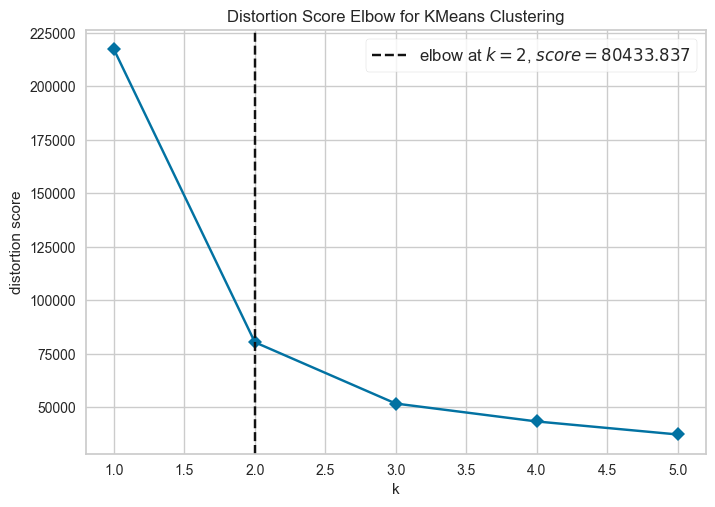

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,6), timings=False)
visualizer.fit(df_x)
visualizer.show()

In [109]:
df = pd.concat([df_x, pd.concat([train_y, countrywide_y], axis = 0).reset_index(drop=True)], axis = 1)
df.corr()

,사고유형,시간대,도로형태_상위,도로형태_하위,ECLO
사고유형,1.000000,-0.035106,0.132961,0.253473,0.119518
시간대,-0.035106,1.000000,0.021084,0.013730,0.021505
도로형태_상위,0.132961,0.021084,1.000000,0.488017,0.034025
도로형태_하위,0.253473,0.013730,0.488017,1.000000,0.064515
ECLO,0.119518,0.021505,0.034025,0.064515,1.000000


In [48]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(train_x.loc[:,['사고유형','도로형태_상위','도로형태_하위']])

c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0        1
1        1
2        1
3        2
4        2
        ..
39604    0
39605    2
39606    0
39607    2
39608    2
Name: cluster, Length: 39609, dtype: int32

(0.0, 30.0)

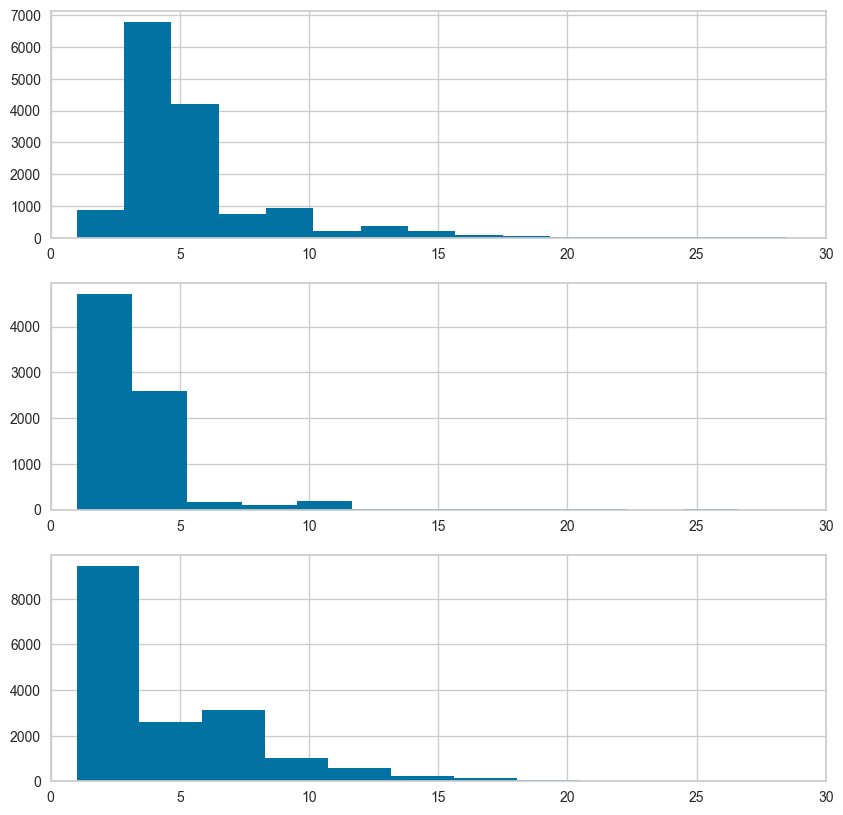

In [50]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
plt.hist(train_y.loc[train_x[train_x['cluster'] == 0].index,], bins=30)
plt.xlim([0,30])

plt.subplot(3,1,2)
plt.hist(train_y.loc[train_x[train_x['cluster'] == 1].index,], bins=30)
plt.xlim([0,30])

plt.subplot(3,1,3)
plt.hist(train_y.loc[train_x[train_x['cluster'] == 2].index,], bins=30)
plt.xlim([0,30])

In [51]:
train_x['cluster'] = kmeans.predict(train_x.loc[:,['사고유형','도로형태_상위','도로형태_하위']])
test_x['cluster'] = kmeans.predict(test_x.loc[:,['사고유형','도로형태_상위','도로형태_하위']])

### 학습 시작

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
print(train_x.shape)
print(train_y.shape)

(39609, 23)
(39609,)


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(23765, 23) (7922, 23) (7922, 23) (23765,) (7922,) (7922,)


In [35]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [36]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models

In [37]:
#train, val 시각화 함수
from math import sqrt

# 결과 시각화 함수
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain RMSE\t\tVal RMSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        rmse_train = sqrt(mse_train)
        rmse_val = sqrt(mse_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{rmse_train:.4f}\t\t{rmse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")

In [38]:
#모델 train / val 평가 함수
from math import sqrt
import matplotlib.pyplot as plt

# train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 RMSE 저장을 위한 리스트
    train_rmse_list = []
    val_rmse_list = []
    model_names = []

    # 각 모델별로 RMSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_rmse = sqrt(mean_squared_error(y_train, train_pred))
        val_rmse = sqrt(mean_squared_error(y_val, val_pred))

        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        model_names.append(name)

    # 선형 그래프로 RMSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_rmse_list, marker='o', label='Training RMSE')
    plt.plot(model_names, val_rmse_list, marker='o', label='Validation RMSE')

    plt.ylabel('RMSE')
    plt.title('Training and Validation RMSE for Different Models')
    plt.legend()

    plt.show()

In [39]:
# 모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest RMSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        rmse_test = sqrt(mean_squared_error(y_test, pred_test))
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{rmse_test:.4f}\t\t{r2_test * 100:.2f}%")

In [40]:
#모델의 훈련 및 검증과정 성능 지표 기록
def plot_training_history(models, X_train, y_train, X_val, y_val):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
    fig.suptitle('Model Training and Validation Performance')

    for name, model in models.items():
        # 모델 학습
        model.fit(X_train, y_train)

        # 성능 지표 계산
        train_mse = mean_squared_error(y_train, model.predict(X_train))
        val_mse = mean_squared_error(y_val, model.predict(X_val))
        train_r2 = r2_score(y_train, model.predict(X_train))
        val_r2 = r2_score(y_val, model.predict(X_val))

        # MSE 그래프
        axes[0].plot([1, 2], [train_mse, val_mse], marker='o', label=f'{name}')
        axes[0].set_xticks([1, 2])
        axes[0].set_xticklabels(['Train', 'Validation'])
        axes[0].set_title('Mean Squared Error (MSE)')
        axes[0].set_ylabel('MSE')
        axes[0].legend()

        # R² 그래프
        axes[1].plot([1, 2], [train_r2, val_r2], marker='o', label=f'{name}')
        axes[1].set_xticks([1, 2])
        axes[1].set_xticklabels(['Train', 'Validation'])
        axes[1].set_title('R² Score')
        axes[1].set_ylabel('R² Score')
        axes[1].legend()

    plt.show()

In [41]:
#모델 훈련
models = train_models(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 23765, number of used features: 22
[LightGBM] [Info] Start training from score 4.726951


In [42]:
#train / test 성능평가
evaluate_models(models, X_train, y_train, X_val, y_val)

Model Performance Evaluation:

Model                	Train RMSE		Val RMSE    		Train R²	Val R²
---------------------------------------------------------------
LinearRegression 	3.1314		3.2237		0.04		0.04
Lasso            	3.1960		3.2890		0.00		0.00
Ridge            	3.1314		3.2236		0.04		0.04
XGBRegressor     	2.5152		3.3411		0.38		-0.03
LGBMRegressor    	2.9413		3.2403		0.15		0.03


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 23765, number of used features: 22
[LightGBM] [Info] Start training from score 4.726951


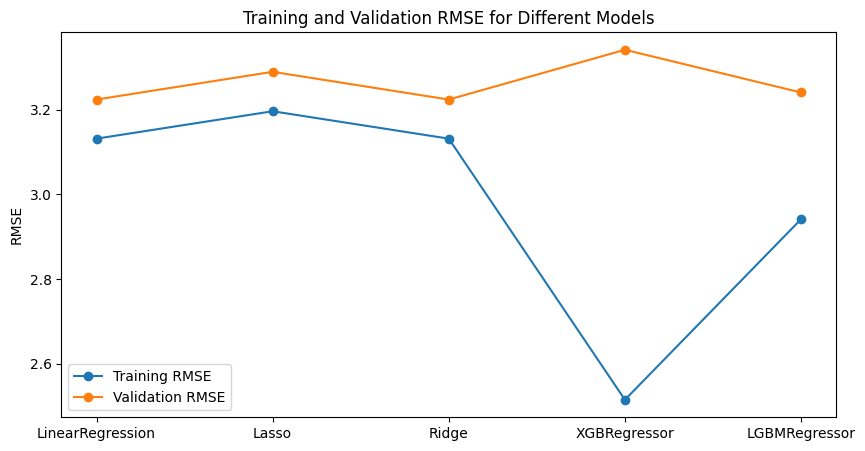

In [43]:
#(train / val) 시각화
plot_mse_for_models_line(models, X_train, y_train, X_val, y_val)

In [44]:
#모델 test평가
evaluate_models_on_test(models, X_test, y_test)

Model Test Performance Evaluation:

Model            	Test RMSE		Test R²
---------------------------------------------------------
LinearRegression 	3.0944		3.76%
Lasso            	3.1540		0.01%
Ridge            	3.0943		3.76%
XGBRegressor     	3.2959		-9.19%
LGBMRegressor    	3.1136		2.56%


[0]	validation_0-rmse:3.14649	validation_1-rmse:3.26179
[1]	validation_0-rmse:3.11548	validation_1-rmse:3.24896
[2]	validation_0-rmse:3.09502	validation_1-rmse:3.24332
[3]	validation_0-rmse:3.08041	validation_1-rmse:3.23596
[4]	validation_0-rmse:3.06877	validation_1-rmse:3.23419
[5]	validation_0-rmse:3.04843	validation_1-rmse:3.23678


[6]	validation_0-rmse:3.03666	validation_1-rmse:3.23617
[7]	validation_0-rmse:3.02650	validation_1-rmse:3.23711
[8]	validation_0-rmse:3.02168	validation_1-rmse:3.23856
[9]	validation_0-rmse:3.01468	validation_1-rmse:3.24057
[10]	validation_0-rmse:3.00204	validation_1-rmse:3.24312
[11]	validation_0-rmse:2.99457	validation_1-rmse:3.24311
[12]	validation_0-rmse:2.98250	validation_1-rmse:3.24426
[13]	validation_0-rmse:2.97612	validation_1-rmse:3.24575


c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


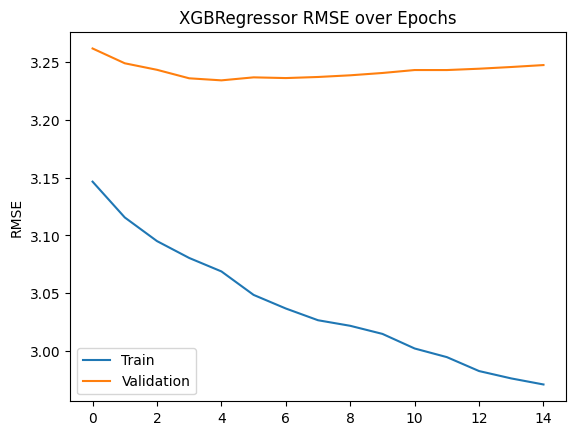

Xgboost Best Epoch:  4


In [45]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train, y_train), (X_val, y_val)]
reg_xgb.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))

XGBoost Test MSE:  9.90609549036338
XGBoost Test R² Score: 0.43%


In [47]:
pred_test_xgb_earyly = reg_xgb.predict(test_x, iteration_range=(0, best_epoch + 1))

In [48]:
Target_Encoder_xgb_early = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/sample_submission.csv')

In [49]:
len(pred_test_xgb_earyly)

10963

In [50]:
Target_Encoder_xgb_early['ECLO'] = pred_test_xgb_earyly

# 결과 확인
Target_Encoder_xgb_early

,ID,ECLO
0,ACCIDENT_39609,4.281824
1,ACCIDENT_39610,4.011729
2,ACCIDENT_39611,5.242146
3,ACCIDENT_39612,4.765567
4,ACCIDENT_39613,5.359161
...,...,...
10958,ACCIDENT_50567,5.910322
10959,ACCIDENT_50568,4.929626
10960,ACCIDENT_50569,5.150208
10961,ACCIDENT_50570,5.016682


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 3.22881	valid_0's l2: 10.4252


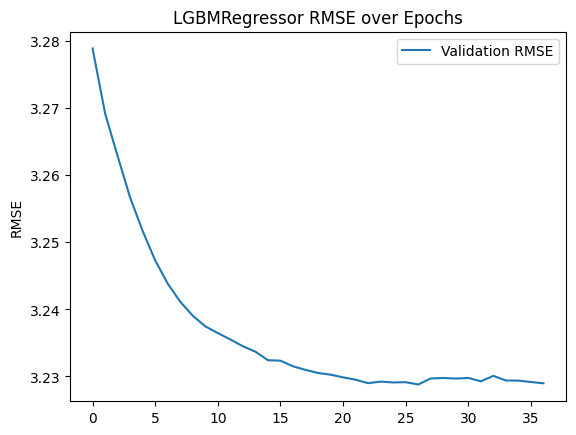

Best Iteration:  27


In [51]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("Test MSE: ", mse_test)
print("Test R² Score: {:.2f}%".format(r2_test * 100))

Test MSE:  9.611361018824851
Test R² Score: 3.39%


In [53]:
pred_test = reg_lgbm.predict(test_x, num_iteration=best_iteration)

In [54]:
Target_Encoder_lgb = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/sample_submission.csv')

In [55]:
Target_Encoder_lgb

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0
...,...,...
10958,ACCIDENT_50567,0
10959,ACCIDENT_50568,0
10960,ACCIDENT_50569,0
10961,ACCIDENT_50570,0


In [56]:
Target_Encoder_lgb['ECLO'] = pred_test

# 결과 확인
Target_Encoder_lgb

,ID,ECLO
0,ACCIDENT_39609,4.135048
1,ACCIDENT_39610,3.855372
2,ACCIDENT_39611,5.816440
3,ACCIDENT_39612,4.652347
4,ACCIDENT_39613,4.910779
...,...,...
10958,ACCIDENT_50567,5.861150
10959,ACCIDENT_50568,4.871075
10960,ACCIDENT_50569,5.008975
10961,ACCIDENT_50570,5.523002


#### Deep learning

In [57]:
import numpy as np
import tensorflow as tf
from keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from scikeras.wrappers import KerasRegressor

# GPU 메모리 관리 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # 현재 프로그램에 필요한 만큼의 GPU 메모리만 할당
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 성장을 설정해야만 합니다
        print(e)

# RMSLE 손실 함수 정의
def rmsle(y_true, y_pred):
    y_true = tf.maximum(tf.cast(y_true, tf.float32), 0)
    y_pred = tf.maximum(tf.cast(y_pred, tf.float32), 0)
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    return tf.sqrt(tf.reduce_mean(squared_error))

# 모델 생성 함수 정의
def create_model(learning_rate, l1_reg, l2_reg):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l1_regularizer(l1_reg))(x)
    x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2_regularizer(l2_reg))(x)
    output_layer = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss=rmsle,
                  metrics=[rmsle])
    return model

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred) #차이 손실함수 반환

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

In [58]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
] 
'''
#EarlyStopping
val_loss: 데이터 손실을 관찰하겠다는 의미
patience: 검증데이터의 손실이 (30) epoch동안 개선되지 않으면 훈련 중단
verbose = 2:  조기 주단이 발생했을 때 화면에 로그를 표시
#mode = min: 관찰하고 있는 메트릭이 최소화 (손실 최소화)
restore_best_weights = true: 조기 중단 발생시 가장 좋은 가중치로 모델 복원

#ReduceLROnPlateau: 학습률을 동적으로 조정하는데 사용
monitor = val_loss: 검증 데이터이 손실 관찰
factor = 0.8: 손실이 개선되지 않을 때 학습률 80% 감소
patience: 3에포크 동안 손실 개선되지 않으면 학습률 조정
min_lr = 0.00001은 학습률의 하한선 설정

#TreminateOnNaN:
수치적 불안정성으로 인해 손실이 NAN이 되는 경우 훈련 즉시 중단.


'''

'\n#EarlyStopping\nval_loss: 데이터 손실을 관찰하겠다는 의미\npatience: 검증데이터의 손실이 (30) epoch동안 개선되지 않으면 훈련 중단\nverbose = 2:  조기 주단이 발생했을 때 화면에 로그를 표시\n#mode = min: 관찰하고 있는 메트릭이 최소화 (손실 최소화)\nrestore_best_weights = true: 조기 중단 발생시 가장 좋은 가중치로 모델 복원\n\n#ReduceLROnPlateau: 학습률을 동적으로 조정하는데 사용\nmonitor = val_loss: 검증 데이터이 손실 관찰\nfactor = 0.8: 손실이 개선되지 않을 때 학습률 80% 감소\npatience: 3에포크 동안 손실 개선되지 않으면 학습률 조정\nmin_lr = 0.00001은 학습률의 하한선 설정\n\n#TreminateOnNaN:\n수치적 불안정성으로 인해 손실이 NAN이 되는 경우 훈련 즉시 중단.\n\n\n'

In [69]:
# KerasRegressor 래퍼를 사용
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0,
                       learning_rate = [0.01, 0.001, 0.0001],
                        l1_reg= [0.002, 0.001, 0.0005],
                        l2_reg = [0.0002, 0.00001, 0.00005]
                        )

# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'l1_reg': [0.002, 0.001, 0.0005],
    'l2_reg': [0.0002, 0.00001, 0.00005],
    'batch_size': [32, 64, 128]
}

# 사용자 정의 스코어링 함수 (RMSLE)
def rmsle_scorer(y_true, y_pred):
    y_true = np.maximum(y_true, 0)
    y_pred = np.maximum(y_pred, 0)
    squared_error = np.square(np.log1p(y_pred) - np.log1p(y_true))
    return np.sqrt(np.mean(squared_error))

# GridSearchCV 생성
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    scoring=make_scorer(rmsle_scorer, greater_is_better=False), 
                    cv=3)

# 그리드 서치 실행
grid_result = grid.fit(train_x.astype('float32'), train_y.astype('float32'))

# 결과 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# 결과를 데이터프레임으로 변환 후 CSV 파일로 저장
results_df = pd.DataFrame(grid_result.cv_results_)
results_df.to_csv('one_hot_hyperparameter_tuning_results_1205.csv', index=False)

c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\JJH\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use o

Best: -0.443710 using {'batch_size': 128, 'l1_reg': 0.0005, 'l2_reg': 0.0002, 'learning_rate': 0.001}


In [70]:
# 최적화된 하이퍼파라미터를 받아 모델을 생성하는 함수
def create_optimized_model(l1_reg, l2_reg, learning_rate):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l1_regularizer(l1_reg))(x)
    x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2_regularizer(l2_reg))(x)
    output_layer = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss=loss_fn,
                  metrics=[metric_fn])
    return model

# 최적화된 하이퍼파라미터를 사용하여 모델 생성
best_params = grid_result.best_params_
optimized_model = create_optimized_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])

# 모델 학습
history = optimized_model.fit(train_x.astype('float32'), train_y.astype('float32'),
                              epochs=100, batch_size=best_params['batch_size'], verbose=1,
                              validation_split=0.1, callbacks=callbacks_list)

Epoch 1/100


279/279 [==============================] - 1s 2ms/step - loss: 0.6515 - metric_fn: 0.6104 - val_loss: 2.7911 - val_metric_fn: 2.7523 - lr: 0.0010
Epoch 2/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4956 - metric_fn: 0.4596 - val_loss: 0.6435 - val_metric_fn: 0.6102 - lr: 0.0010
Epoch 3/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4836 - metric_fn: 0.4527 - val_loss: 0.4615 - val_metric_fn: 0.4329 - lr: 0.0010
Epoch 4/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4756 - metric_fn: 0.4491 - val_loss: 0.4552 - val_metric_fn: 0.4306 - lr: 0.0010
Epoch 5/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4698 - metric_fn: 0.4472 - val_loss: 0.4497 - val_metric_fn: 0.4287 - lr: 0.0010
Epoch 6/100
279/279 [==============================] - 0s 1ms/step - loss: 0.4656 - metric_fn: 0.4462 - val_loss: 0.4458 - val_metric_fn: 0.4278 - lr: 0.0010
Epoch 7/100
279/279 [==============================] - 0s 1ms/st

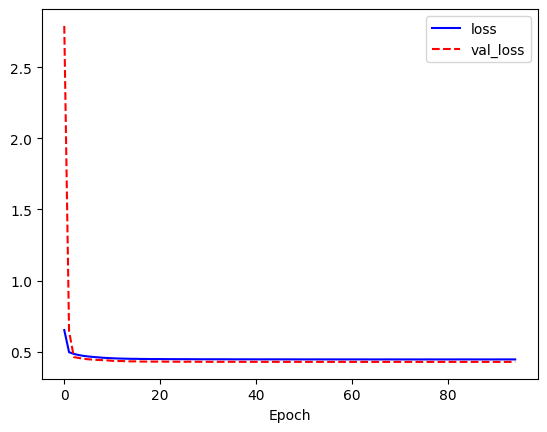

In [71]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [72]:
sample_submission = pd.read_csv('C:/Users/JJH/Desktop/대구 교통사고/sample_submission.csv')

sample_submission["ECLO"] = optimized_model.predict(test_x.astype('float32'))

sample_submission.to_csv("Onehotencoding_dl_BEST_1205.csv", index=False)

209/343 [=================>............] - ETA: 0s

343/343 [==============================] - 0s 774us/step
